In [1]:
#https://www.youtube.com/watch?v=XFnLN84Fz24
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
from tensorflow.keras import Sequential

In [5]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization

In [6]:
from tensorflow.keras.layers import Conv1D,MaxPool1D

In [7]:
transactions = pd.read_csv('desktop\creditcard.csv')

In [8]:
transactions.shape

(284807, 31)

In [9]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
transactions.isnull().any().any()

False

In [11]:
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
transactions['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [13]:
X = transactions.drop(labels='Class', axis=1) # Features
y = transactions.loc[:,'Class']#response

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1, stratify=y)

In [16]:
X_train.shape

(28480, 30)

In [17]:
X_test.shape

(256327, 30)

In [18]:
from sklearn.feature_selection import SelectPercentile

In [19]:
select = SelectPercentile(percentile = 75)

In [20]:
select.fit(X_train,y_train)

SelectPercentile(percentile=74,
                 score_func=<function f_classif at 0x00000192DE1EA678>)

In [21]:
X_train_selected=select.transform(X_train)

In [22]:
X_test_selected=select.transform(X_test)

In [23]:
print('X_train.shape is :{}'.format(X_train.shape))

X_train.shape is :(28480, 30)


In [24]:
print('X_train_selected.shape is :{}'.format(X_train_selected.shape))

X_train_selected.shape is :(28480, 22)


In [25]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [26]:
sm = SMOTE(random_state = 2)

In [27]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [28]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [29]:
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_y: (56862,) 



In [30]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

After OverSampling, counts of label '1': 28431


In [31]:
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '0': 28431


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
stdscaler=StandardScaler()

In [34]:
X=stdscaler.fit_transform(X)

In [35]:
X

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [36]:
y_train=y_train.to_numpy()

In [37]:
y_test=y_test.to_numpy()

In [38]:
X_train_selected=X_train_selected.reshape(X_train_selected.shape[0],X_train_selected.shape[1],1)

In [39]:
X_test_selected=X_test_selected.reshape(X_test_selected.shape[0],X_test_selected.shape[1],1)

In [40]:
X_train_selected.shape


(28480, 22, 1)

In [41]:
X_test_selected.shape

(256327, 22, 1)

In [42]:
y_train.shape

(28480,)

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

In [44]:
model= Sequential()

In [45]:
model.add(GRU(units=22,return_sequences=True,input_shape=(X_train_selected.shape[1],1),activation='sigmoid'))

In [46]:
model.add(Dropout(0.2))

In [47]:
model.add(GRU(units=10,return_sequences=False,activation='sigmoid'))

In [48]:
model.add(Dropout(0.2))

In [49]:
model.add(Dense(units=1,activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 22, 22)            1584      
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 10)                990       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 2,585
Trainable params: 2,585
Non-trainable params: 0
_________________________________________________________________


In [51]:
from tensorflow.keras.optimizers import Adam

In [52]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
history= model.fit(X_train_selected,y_train,epochs=100,validation_data=(X_test_selected,y_test),verbose=1)

Train on 28480 samples, validate on 256327 samples
Epoch 1/100
28480/28480 [==============================] - 88s 3ms/step - loss: 0.2219 - accuracy: 0.9447 - val_loss: 0.0618 - val_accuracy: 0.9983
Epoch 2/100
28480/28480 [==============================] - 73s 3ms/step - loss: 0.0548 - accuracy: 0.9983 - val_loss: 0.0264 - val_accuracy: 0.9983
Epoch 3/100
28480/28480 [==============================] - 53s 2ms/step - loss: 0.0325 - accuracy: 0.9983 - val_loss: 0.0171 - val_accuracy: 0.9983
Epoch 4/100
28480/28480 [==============================] - 49s 2ms/step - loss: 0.0236 - accuracy: 0.9983 - val_loss: 0.0139 - val_accuracy: 0.9983
Epoch 5/100
28480/28480 [==============================] - 48s 2ms/step - loss: 0.0186 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 6/100
28480/28480 [==============================] - 44s 2ms/step - loss: 0.0160 - accuracy: 0.9983 - val_loss: 0.0128 - val_accuracy: 0.9983
Epoch 7/100
28480/28480 [==============================] - 48

In [56]:
def plot_learningCurve(history,epoch):
    #PLOT TRAINING AND VALIDATION ACCURACY VALUES
    epoch_range= range(1,epoch+1)
    plt.plot(epoch_range,history.history['acc'])
    plt.plot(epoch_range,history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.ylabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    
    #plot training and validation loss values:
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.ylabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()

In [57]:
plot_learningCurve(history,epoch)

NameError: name 'epoch' is not defined

In [58]:
#https://blog.usejournal.com/credit-card-fraud-detection-by-neural-network-in-keras-4bd81cc9e7fe
# Predicting the Test set results
y_pred = model.predict(X_test_selected)

In [59]:
y_pred = (y_pred > 0.5)

In [60]:

score = model.evaluate(X_test_selected, y_test)

256327/256327 [==============================] - 36s 140us/step


In [61]:
#https://www.analyzeinsights.com/single-post/2017/10/16/Part-1-Credit-Card-Fraud-Detection-Analysis-on-Imbalanced-Data
score

[0.0039123187033642, 0.9992704391479492]

In [62]:
#Let's see how our model performed
from sklearn.metrics import classification_report

In [63]:
sklearn.metrics.classification_report

NameError: name 'sklearn' is not defined

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255884
           1       0.81      0.75      0.78       443

    accuracy                           1.00    256327
   macro avg       0.91      0.88      0.89    256327
weighted avg       1.00      1.00      1.00    256327



In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_test, y_pred)

array([[255807,     77],
       [   110,    333]], dtype=int64)

In [67]:
from sklearn.metrics import matthews_corrcoef

In [68]:
MCC=matthews_corrcoef(y_test,y_pred)

In [69]:
print(" Matthews correlation coefficient is{}".format(MCC))

 Matthews correlation coefficient is0.7809955296478702


In [70]:
from sklearn.metrics import roc_curve

In [71]:
y_pred_keras = model.predict(X_test_selected).ravel()

In [72]:

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras,pos_label=True)

In [73]:
from sklearn.metrics import auc

In [74]:
auc_keras = auc(fpr_keras, tpr_keras)

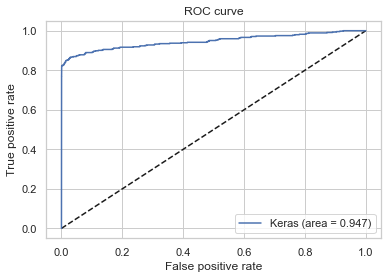

In [75]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

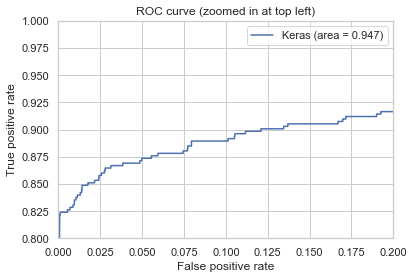

In [76]:
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [77]:
## Import data visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

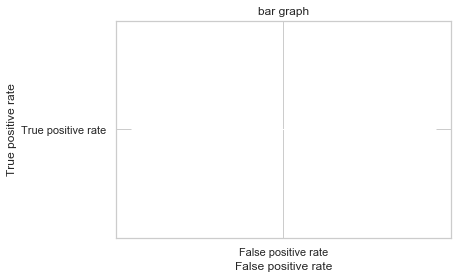

In [78]:
plt.bar("False positive rate", "True positive rate", label= 'creditcard' , color = "blue")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("bar graph")
plt.show()
